## 2.4.1 : Mô tả về dữ liệu

Loại dữ liệu:

- Dữ liệu dạng bảng với 50 hàng và 11 cột.
- Mỗi hàng đại diện cho một mẫu dữ liệu.
- Mỗi cột đại diện cho một thuộc tính của mẫu dữ liệu.

Tên các cột:

- Cột 1: "STT" - Số thứ tự của mẫu dữ liệu.
- Cột 2-8: "câu 1" - "câu 7" - các câu hỏi trả lời bằng tick (từ 1 đến 5) 
- Cột 9-11: "câu 8" - "câu 10" - các câu hỏi trả lời bằng text
- Các giá trị từ 1 - 5 tương ứng với câu trả lời   

    1.Không nghiêm trọng 

	2.Hơi nghiêm trọng

	3.Trung bình

	4.Nghiêm trọng

	5.Rất nghiêm trọng


Kiểu dữ liệu:

- Dữ liệu trong các cột "câu 1" - "câu 7" là số nguyên
- Dữ liệu trong các cột "câu 8" - "câu 9" lầ văn bảng
- Dữ liệu trong cột "STT" là số nguyên.

## 2.4.2 : Thực hiện các thống kê căn bản

In [15]:
import pandas as pd

data = pd.read_csv("demodulieu.csv")

print(data.head(5))

   STT  câu 1  câu 2  câu 3  câu 4  câu 5  câu 6  câu 7  câu 8  câu 9  câu 10
0    1      1      1      1      3      4      5      2    NaN    NaN     NaN
1    2      1      2      4      5      4      3      2    NaN    NaN     NaN
2    3      1      5      4      3      2      4      3    NaN    NaN     NaN
3    4      3      2      2      2      2      4      2    NaN    NaN     NaN
4    5      4      3      3      1      1      5      2    NaN    NaN     NaN


In [16]:
# Đếm số lượng câu trả lời cho mỗi câu hỏi
count_answers = data.iloc[:, 1:].count()

# In kết quả
print(count_answers)

câu 1     50
câu 2     50
câu 3     50
câu 4     50
câu 5     50
câu 6     50
câu 7     50
câu 8      0
câu 9      0
câu 10     0
dtype: int64


In [17]:
# Tính trung bình, phương sai và độ lệch chuẩn cho mỗi câu hỏi
mean_answers = data.iloc[:, 1:].mean()
variance_answers = data.iloc[:, 1:].var()
std_answers = data.iloc[:, 1:].std()

# In kết quả
print("Trung bình:\n", mean_answers)
print("Phương sai:\n", variance_answers)
print("Độ lệch chuẩn:\n", std_answers)

Trung bình:
 câu 1     2.28
câu 2     1.96
câu 3     1.90
câu 4     1.70
câu 5     2.10
câu 6     2.14
câu 7     1.90
câu 8      NaN
câu 9      NaN
câu 10     NaN
dtype: float64
Phương sai:
 câu 1     1.511837
câu 2     1.141224
câu 3     1.193878
câu 4     0.908163
câu 5     1.438776
câu 6     1.347347
câu 7     1.112245
câu 8          NaN
câu 9          NaN
câu 10         NaN
dtype: float64
Độ lệch chuẩn:
 câu 1     1.229568
câu 2     1.068281
câu 3     1.092647
câu 4     0.952976
câu 5     1.199490
câu 6     1.160753
câu 7     1.054630
câu 8          NaN
câu 9          NaN
câu 10         NaN
dtype: float64


## 2.4.3 : Tìm mối tương quan giữa các câu hỏi khảo sát và kết quả

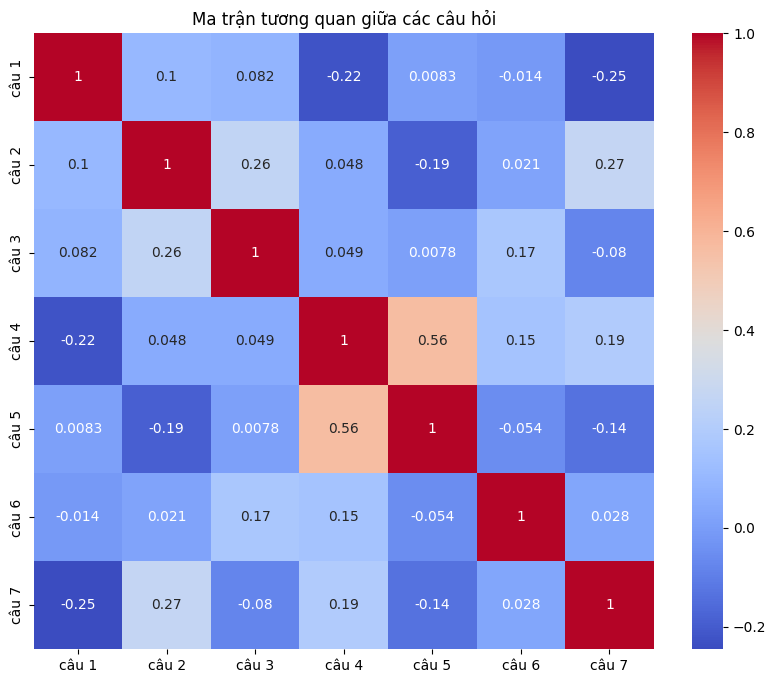

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tải dữ liệu từ tệp CSV
df = pd.read_csv("demodulieu.csv")

# Chọn các cột liên quan
survey_data = df[["câu 1", "câu 2", "câu 3", "câu 4", "câu 5", "câu 6", "câu 7"]]

# Chuyển các giá trị phân loại sang số
severity_map = {"Không nghiêm trọng": 1, 
                "Hơi nghiêm trọng": 2, 
                "Trung bình": 3, 
                "Nghiêm trọng": 4, 
                "Rất nghiêm trọng": 5}

survey_data = survey_data.replace(severity_map)

# Tính toán độ tương quan
correlations = survey_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các câu hỏi")
plt.show()

# Phân tích các tương quan và rút ra kết luận về mối quan hệ giữa các câu hỏi
# Ví dụ, nếu "câu 1" và "câu 2" có một tương quan dương mạnh, nó cho thấy 
# những người tham gia khảo sát đánh giá "câu 1" nghiêm trọng hơn cũng có xu hướng đánh giá "câu 2" nghiêm trọng hơn.

## 2.4.5 : Xác định các yếu tố quan trọng ảnh hưởng đến kết quả

## 2.4.5 : Trực quan hóa dữ liệu và kết quả

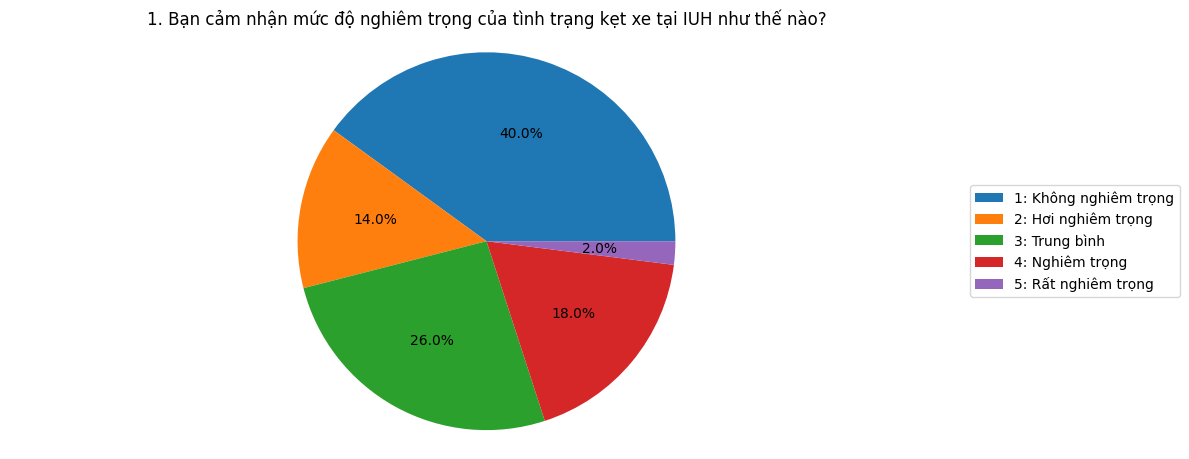

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('demodulieu.csv')

# Lấy dữ liệu cho câu hỏi 1 và câu hỏi 2
question_1 = data["câu 1"]
question_2 = data["câu 2"]
question_3 = data["câu 3"]
question_4 = data["câu 4"]
question_5 = data["câu 5"]
question_6 = data["câu 6"]
question_7 = data["câu 7"]

# Tạo bảng gợi ý phụ
labels = ['1: Không nghiêm trọng', '2: Hơi nghiêm trọng', '3: Trung bình', '4: Nghiêm trọng', '5: Rất nghiêm trọng']


# Đếm số lượng câu trả lời cho từng giá trị
counts = question_1.value_counts().sort_index()
counts_2 = question_2.value_counts().sort_index()
counts_3 = question_3.value_counts().sort_index()
counts_4 = question_4.value_counts().sort_index()
counts_5 = question_5.value_counts().sort_index()
counts_6 = question_6.value_counts().sort_index()
counts_7 = question_7.value_counts().sort_index()

# Trực quan hóa dữ liệu thành biểu đồ Pie
plt.figure(figsize=(12, 9))

# Biểu đồ cho câu hỏi 1
plt.subplot(2, 1, 1)
plt.title('1. Bạn cảm nhận mức độ nghiêm trọng của tình trạng kẹt xe tại IUH như thế nào?')
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


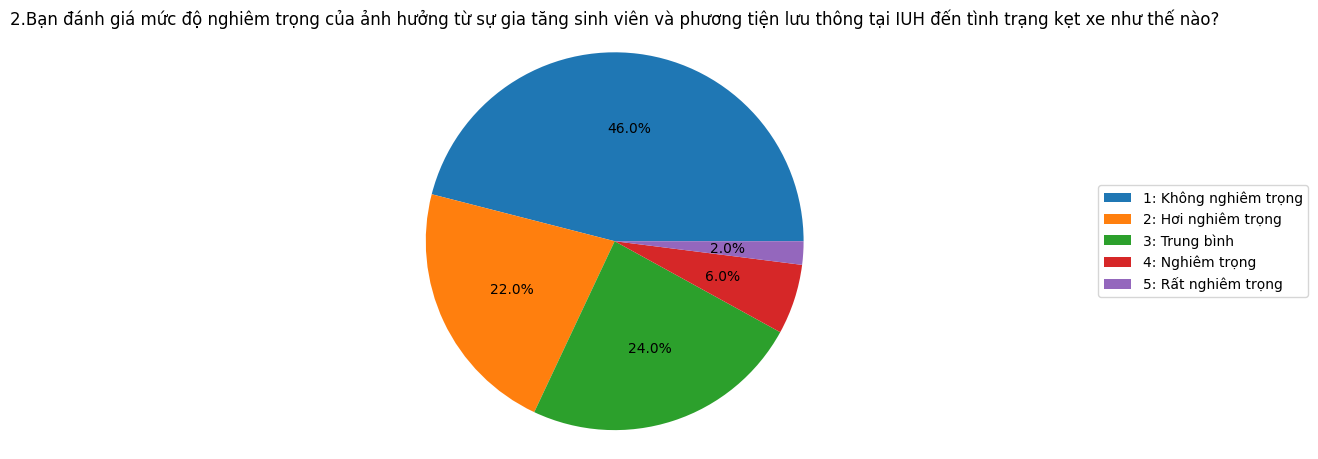

In [20]:
# Biểu đồ cho câu hỏi 2
plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 2)
plt.title('2.Bạn đánh giá mức độ nghiêm trọng của ảnh hưởng từ sự gia tăng sinh viên và phương tiện lưu thông tại IUH đến tình trạng kẹt xe như thế nào?')

plt.pie(counts_2, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()




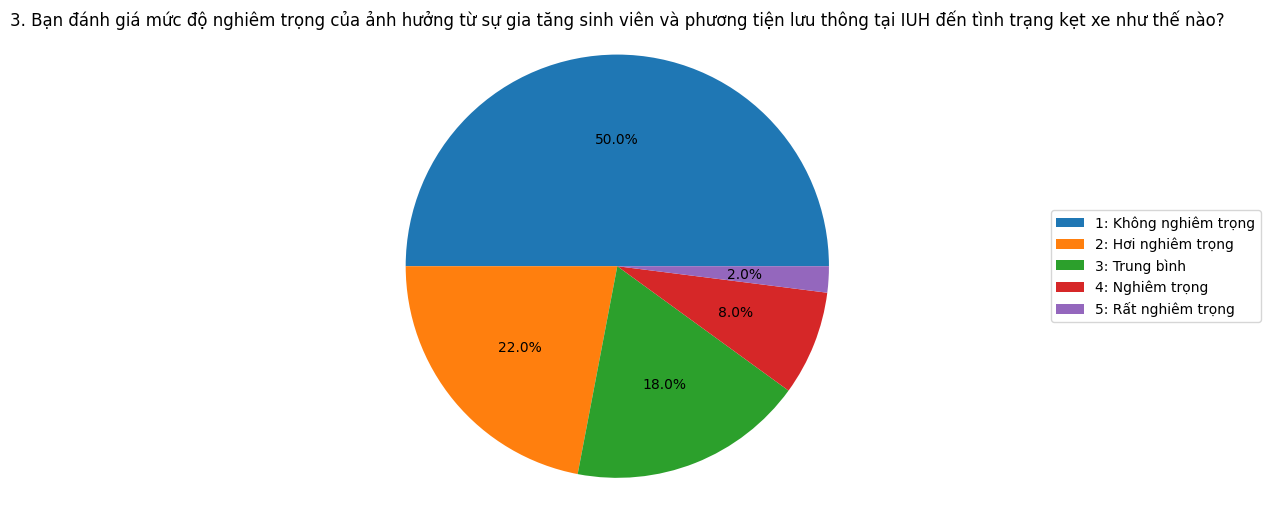

In [21]:
# Biểu đồ cho câu hỏi 3
plt.figure(figsize=(11, 10))
plt.subplot(2, 1, 2)
plt.title('3. Bạn đánh giá mức độ nghiêm trọng của ảnh hưởng từ sự gia tăng sinh viên và phương tiện lưu thông tại IUH đến tình trạng kẹt xe như thế nào?')
plt.pie(counts_3, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

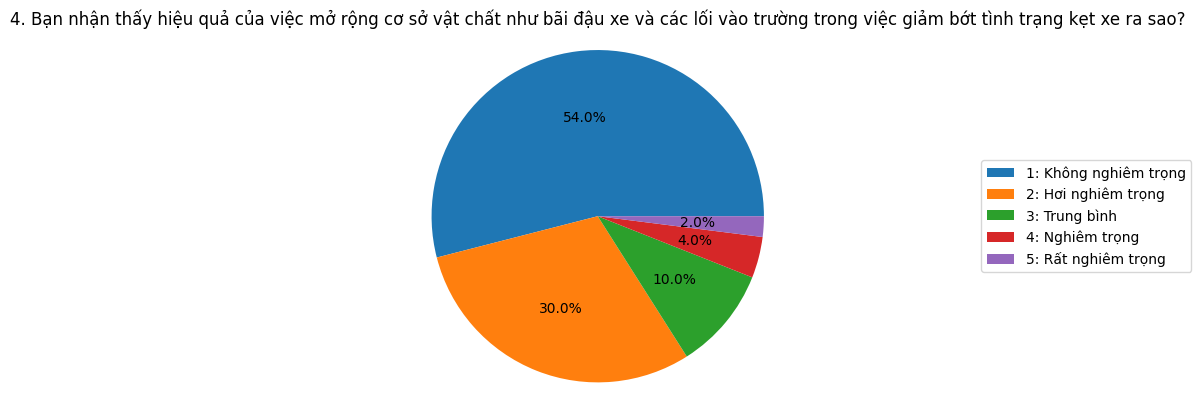

In [22]:
# Biểu đồ cho câu hỏi 4
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.title('4. Bạn nhận thấy hiệu quả của việc mở rộng cơ sở vật chất như bãi đậu xe và các lối vào trường trong việc giảm bớt tình trạng kẹt xe ra sao?')
plt.pie(counts_4, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

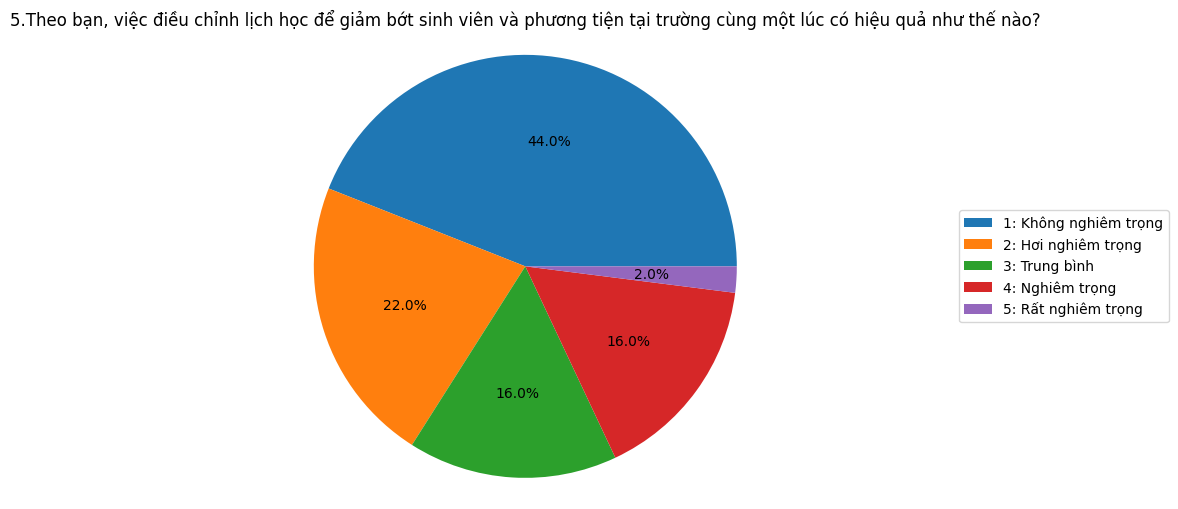

In [26]:
# Biểu đồ cho câu hỏi 5
plt.figure(figsize=(11, 10))
plt.subplot(2, 1, 2)
plt.title('5.Theo bạn, việc điều chỉnh lịch học để giảm bớt sinh viên và phương tiện tại trường cùng một lúc có hiệu quả như thế nào?')
plt.pie(counts_5, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

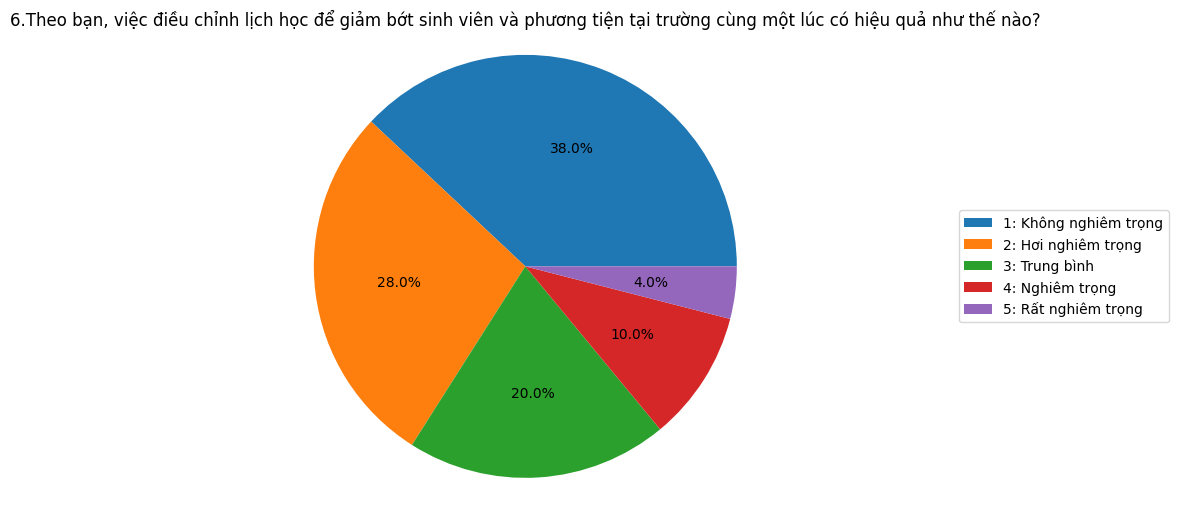

In [27]:
# Biểu đồ cho câu hỏi 6
plt.figure(figsize=(11, 10))
plt.subplot(2, 1, 2)
plt.title('6.Theo bạn, việc điều chỉnh lịch học để giảm bớt sinh viên và phương tiện tại trường cùng một lúc có hiệu quả như thế nào?')
plt.pie(counts_6, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

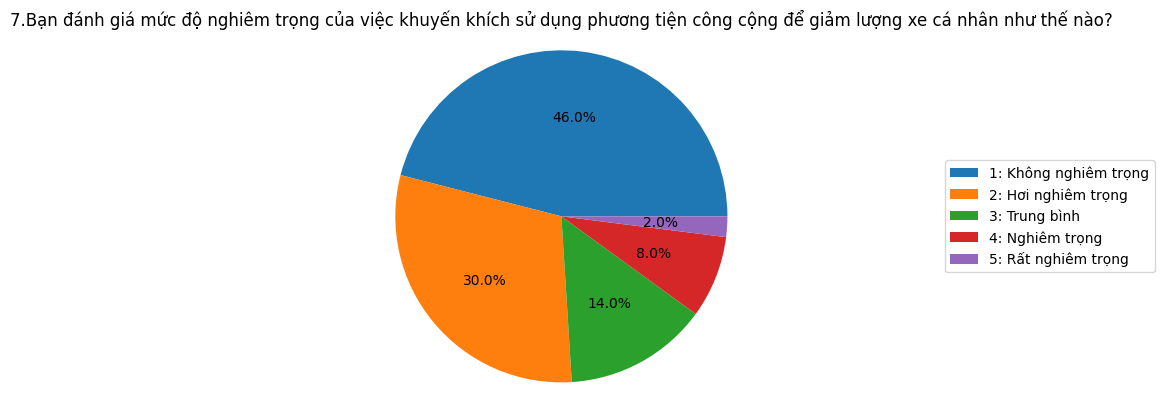

In [28]:
# Biểu đồ cho câu hỏi 7
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.title('7.Bạn đánh giá mức độ nghiêm trọng của việc khuyến khích sử dụng phương tiện công cộng để giảm lượng xe cá nhân như thế nào?')
plt.pie(counts_7, autopct='%1.1f%%')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()